In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv('C:/Users/Yash/Desktop/weather.csv')


In [12]:
# Make variables some friendlier names for users
old_names = ['Max TemperatureF', 'Min TemperatureF', 'Mean TemperatureF', 'Max Dew PointF', 'MeanDew PointF',
             'Min DewpointF', 'Max Humidity',
             ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn',
             ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles',
             ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn',
             ' CloudCover', ' WindDirDegrees', ' Events']
new_names = ['maxTemp', 'minTemp', 'meanTemp', 'maxDew', 'meanDew', 'minDew', 'maxHum', 'meanHum', 'minHum', 'maxPress',
             'minPress', 'meanPress', 'maxVis', 'meanVis',
             'minVis', 'maxWind', 'meanWind', 'maxGust', 'preIn', 'cloud', 'WindDir', 'events']
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)


In [13]:
# Delete unused column in CSV File

del data['preIn']

# Remove the bad samples in temperature
data = data[(data['maxTemp'] <= 110) & (data['minTemp'] >= 25)]

# List unique values on example column using drop_duplicates(We can also use unique())
df2 = pd.DataFrame(data, columns=['ZIP'])
u = df2.drop_duplicates(['ZIP'])

In [14]:
zipcodes = [94107, 94063, 94301, 94041, 95113]

# Day of months: start September, end August
x = [30, 61, 91, 122, 153, 182, 213, 243, 274, 304, 335, 366]
labels = ['September','October','November','December','January','February','March','April','May','June','July','August']


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


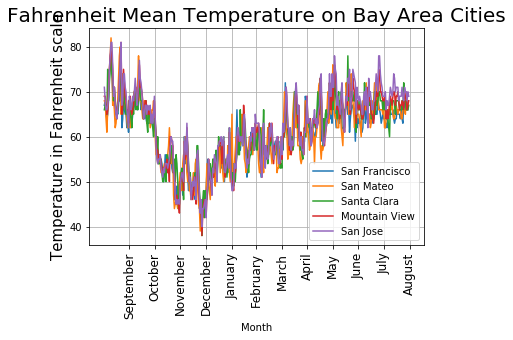

In [15]:
# Plots of Mean temperature in Fahrenheit scale

plt.figure()
for zcode in zipcodes :
    local = data.loc[data['ZIP'] == zcode]
    df1 = pd.DataFrame(local, columns=['meanTemp'])
    plt.plot(df1.as_matrix(), '-', label=str(zcode))  
plt.xticks(x,labels,rotation='vertical',fontsize=12)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Temperature in Fahrenheit scale', fontsize=15)
plt.title('Fahrenheit Mean Temperature on Bay Area Cities',fontsize=20)
plt.legend(["San Francisco", "San Mateo","Santa Clara", "Mountain View","San Jose"])
plt.show()

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


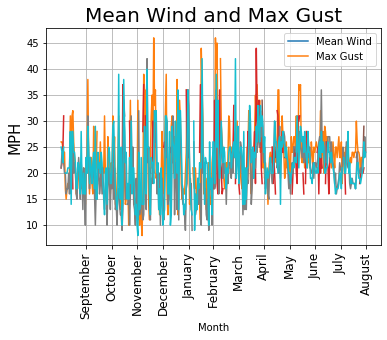

In [16]:
# Plot compare Mean Wind and Max Gust

plt.figure()
for zcode in zipcodes:
    mw = data.loc[data['ZIP'] == zcode]
    df3 = pd.DataFrame(mw, columns=['meanWin', 'maxGust'])
    plt.plot(df3.as_matrix(),'-', label=str(zcode))

plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('MPH', fontsize=15)
plt.title('Mean Wind and Max Gust', fontsize=20)
plt.legend(["Mean Wind","Max Gust"])
plt.show()


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


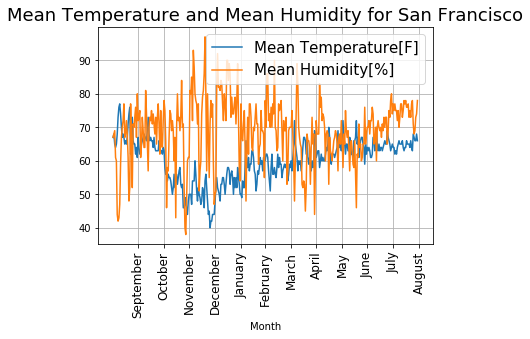

In [17]:
# Plot mean temperature with mean humidity for San Francisco

sf = data.loc[data['ZIP'] == 94107]
plt.figure()
df4 = pd.DataFrame(sf, columns=['meanTemp','meanHum'])
plt.plot(df4.as_matrix(), '-')
plt.grid(True)
plt.autoscale()
plt.xlabel('Month')
plt.ylabel('', fontsize=15)
plt.title('Mean Temperature and Mean Humidity for San Francisco',fontsize=18)
plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.legend(["Mean Temperature[F]", "Mean Humidity[%]"], fontsize=15)
plt.show()


In [18]:
# replace '' string with blank values to zero in CSV file

data.fillna(0, inplace=True)


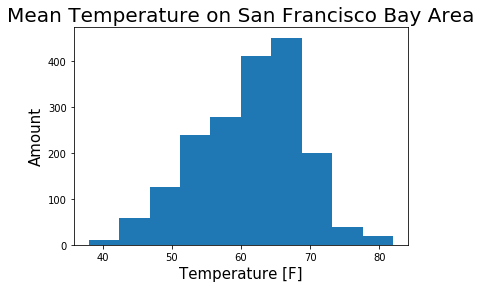

In [19]:
# Histogram of Mean Temperature in All cities in Bay Area

plot_hist = plt.hist(data['meanTemp'], bins=10)
plt.xlabel('Temperature [F]', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Mean Temperature on San Francisco Bay Area', fontsize=20)
plt.show()


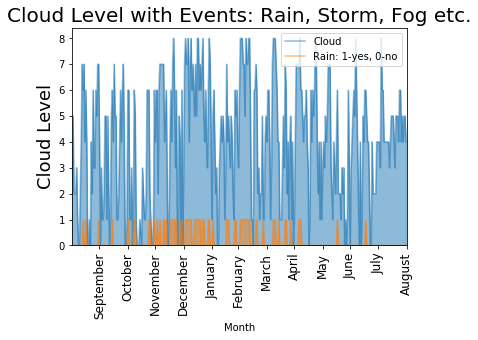

In [20]:
# Plot Area compare Cloud Level and Event such as rain, rain-thunderstorm, fog or fog-rain example for San Francisco

data['events'].replace(['Rain','Rain-Thunderstorm','Fog','Fog-Rain'],[1,1,0,1],inplace=True)
sf = data.loc[data['ZIP'] == 94107]
df7 = pd.DataFrame(sf, columns=['cloud','events'])
df7.plot.area(stacked=False)
plt.xlabel('Month')
plt.ylabel('Cloud Level', fontsize=18)
plt.title('Cloud Level with Events: Rain, Storm, Fog etc.',fontsize=20)
plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.legend(["Cloud","Rain: 1-yes, 0-no"])
plt.show()


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


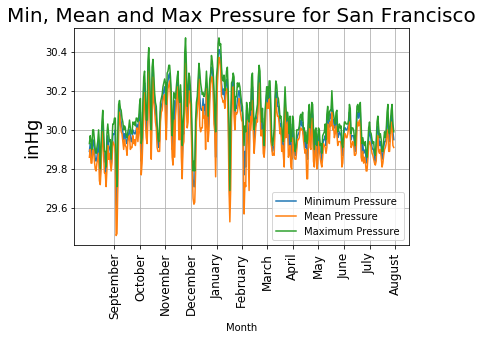

In [21]:
# Plot of min, max and mean pressure for San Francisco


sf = data.loc[data['ZIP'] == 94107]
plt.figure()
df8 = pd.DataFrame(sf, columns=['minPress','meanPress','maxPress'])
plt.plot(df8.as_matrix(), '-')
plt.grid(True)
plt.autoscale()
plt.xlabel('Month')
plt.ylabel('inHg', fontsize=18)
plt.title('Min, Mean and Max Pressure for San Francisco',fontsize=20)
plt.xticks(x,labels,rotation='vertical', fontsize=12)
plt.legend(["Minimum Pressure", "Mean Pressure","Maximum Pressure"])
plt.show()


In [22]:
# Print all data from CSV file
print(data)


            PDT  maxTemp  meanTemp  minTemp  maxDew  meanDew  minDew  maxHum  \
0      9/1/2015       75        67       58      58       56      54      84   
1      9/2/2015       73        68       62      59       56      54      78   
2      9/3/2015       70        65       60      57       54      50      84   
3      9/4/2015       72        64       55      52       50      48      77   
4      9/5/2015       79        65       51      53       48      44      89   
...         ...      ...       ...      ...     ...      ...     ...     ...   
1825  8/27/2016       78        70       61      56       54      53      72   
1826  8/28/2016       79        70       60      56       55      54      84   
1827  8/29/2016       76        68       60      55       54      53      78   
1828  8/30/2016       81        70       59      56       54      52      78   
1829  8/31/2016       78        69       60      57       55      52      84   

      meanHum  minHum  ...  maxVis  mea